In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 数据加载
data = pd.read_csv('user_balance_table.csv', parse_dates=['report_date'])
data.head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN


In [2]:
total_balance = data.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum()
total_balance.head()

,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587


In [3]:
purchase = total_balance[['total_purchase_amt']]
redeem = total_balance[['total_redeem_amt']]

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

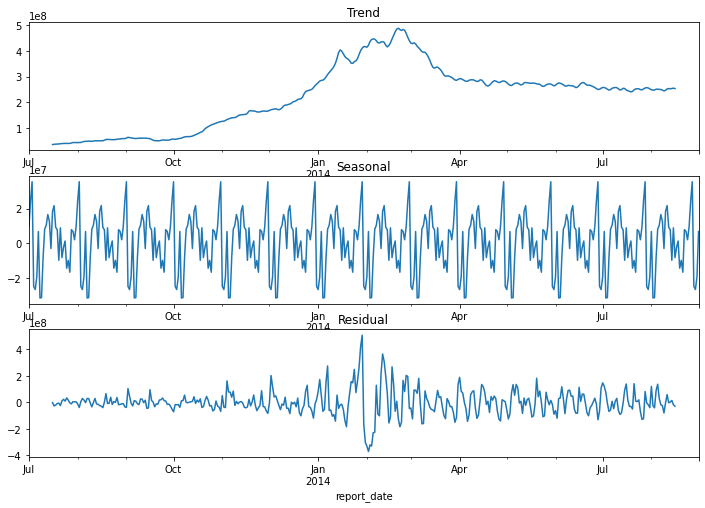

In [5]:
# 对指定区间范围内的数据，进行可视化
def plot_stl(data):
    # STL返回三个部分： trend(趋势)， seasonal(季节)，residual(残差)
    result = sm.tsa.seasonal_decompose(data, period=30)
    # 可视化
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    result.trend.plot(ax=ax1, title='Trend')
    result.seasonal.plot(ax=ax2, title='Seasonal')
    result.resid.plot(ax=ax3, title='Residual')
    
plot_stl(purchase.total_purchase_amt)

In [6]:
purchase_pro = purchase.copy()
redeem_pro = redeem.copy()

In [7]:
purchase_pro['ds'] = purchase_pro.index
purchase_pro.rename(columns={'total_purchase_amt': 'y'}, inplace=True)
purchase_pro.head()

,y,ds
report_date,,
2013-07-01,32488348,2013-07-01
2013-07-02,29037390,2013-07-02
2013-07-03,27270770,2013-07-03
2013-07-04,18321185,2013-07-04
2013-07-05,11648749,2013-07-05


In [8]:
redeem_pro['ds'] = redeem_pro.index
redeem_pro.rename(columns={'total_redeem_amt': 'y'}, inplace=True)
redeem_pro.head()

,y,ds
report_date,,
2013-07-01,5525022,2013-07-01
2013-07-02,2554548,2013-07-02
2013-07-03,5953867,2013-07-03
2013-07-04,6410729,2013-07-04
2013-07-05,2763587,2013-07-05


In [9]:
purchase_pro = purchase_pro.reset_index(drop=True)
redeem_pro = redeem_pro.reset_index(drop=True)
purchase_pro.head()

,y,ds
0,32488348,2013-07-01
1,29037390,2013-07-02
2,27270770,2013-07-03
3,18321185,2013-07-04
4,11648749,2013-07-05


In [10]:
from fbprophet import Prophet

# 拟合Prophet模型
model = Prophet(weekly_seasonality=True,seasonality_prior_scale=0.1)
model.fit(purchase_pro)
# 预测为未来1个月， 9月份30天
future = model.make_future_dataframe(periods = 30)
purchase_pro_pred = model.predict(future)
purchase_pro_pred.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-1.346327e+07,-8.722852e+07,1.413658e+08,-1.346327e+07,-1.346327e+07,4.490339e+07,4.490339e+07,4.490339e+07,4.490339e+07,4.490339e+07,4.490339e+07,0.0,0.0,0.0,3.144012e+07
1,2013-07-02,-1.231669e+07,-8.789273e+07,1.501642e+08,-1.231669e+07,-1.231669e+07,4.760011e+07,4.760011e+07,4.760011e+07,4.760011e+07,4.760011e+07,4.760011e+07,0.0,0.0,0.0,3.528341e+07
2,2013-07-03,-1.117011e+07,-8.680033e+07,1.520065e+08,-1.117011e+07,-1.117011e+07,3.768391e+07,3.768391e+07,3.768391e+07,3.768391e+07,3.768391e+07,3.768391e+07,0.0,0.0,0.0,2.651380e+07
3,2013-07-04,-1.002353e+07,-1.140360e+08,1.232030e+08,-1.002353e+07,-1.002353e+07,1.949135e+07,1.949135e+07,1.949135e+07,1.949135e+07,1.949135e+07,1.949135e+07,0.0,0.0,0.0,9.467810e+06
4,2013-07-05,-8.876955e+06,-1.515389e+08,8.901520e+07,-8.876955e+06,-8.876955e+06,-1.788839e+07,-1.788839e+07,-1.788839e+07,-1.788839e+07,-1.788839e+07,-1.788839e+07,0.0,0.0,0.0,-2.676534e+07


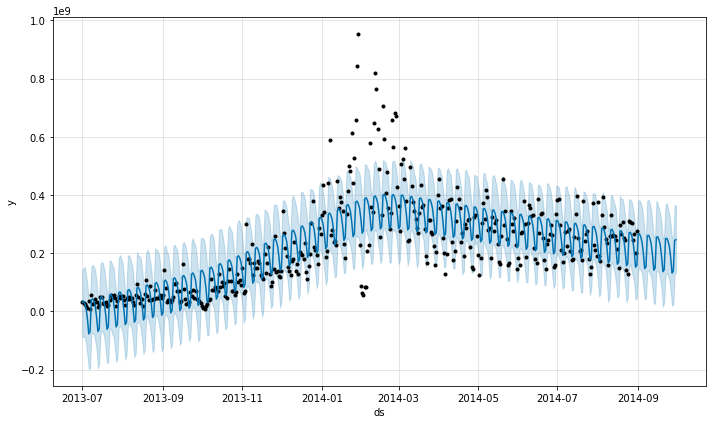

In [11]:
_ = model.plot(purchase_pro_pred)

In [12]:
# 拟合Prophet模型
model2 = Prophet(weekly_seasonality=True,seasonality_prior_scale=0.1)
model2.fit(redeem_pro)
# 预测为未来1个月， 9月份30天
future = model2.make_future_dataframe(periods = 30)
redeem_pro_pred = model2.predict(future)
redeem_pro_pred.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-2.492790e+07,-5.640318e+07,1.146939e+08,-2.492790e+07,-2.492790e+07,4.903844e+07,4.903844e+07,4.903844e+07,4.903844e+07,4.903844e+07,4.903844e+07,0.0,0.0,0.0,2.411054e+07
1,2013-07-02,-2.404155e+07,-9.118774e+07,8.681679e+07,-2.404155e+07,-2.404155e+07,2.278526e+07,2.278526e+07,2.278526e+07,2.278526e+07,2.278526e+07,2.278526e+07,0.0,0.0,0.0,-1.256291e+06
2,2013-07-03,-2.315520e+07,-8.185512e+07,8.606260e+07,-2.315520e+07,-2.315520e+07,2.490961e+07,2.490961e+07,2.490961e+07,2.490961e+07,2.490961e+07,2.490961e+07,0.0,0.0,0.0,1.754417e+06
3,2013-07-04,-2.226885e+07,-1.028287e+08,6.350554e+07,-2.226885e+07,-2.226885e+07,6.128987e+06,6.128987e+06,6.128987e+06,6.128987e+06,6.128987e+06,6.128987e+06,0.0,0.0,0.0,-1.613986e+07
4,2013-07-05,-2.138250e+07,-1.107556e+08,5.884052e+07,-2.138250e+07,-2.138250e+07,-4.533565e+06,-4.533565e+06,-4.533565e+06,-4.533565e+06,-4.533565e+06,-4.533565e+06,0.0,0.0,0.0,-2.591606e+07


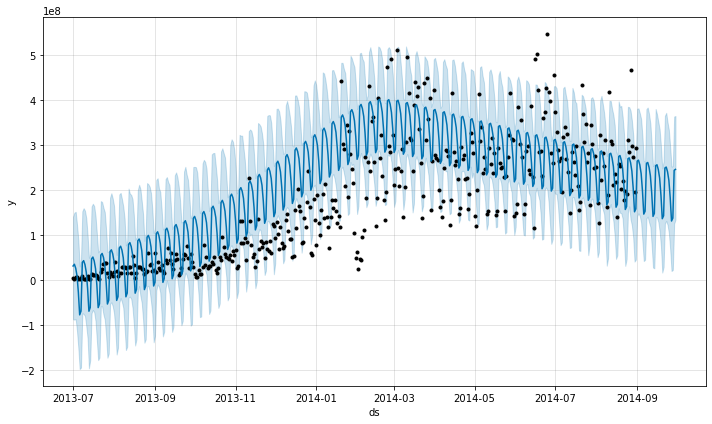

In [13]:
_ = model2.plot(purchase_pro_pred)

In [14]:
purchase_pro2 = purchase_pro_pred[(purchase_pro_pred['ds'] >= '2014-09-01') & (purchase_pro_pred['ds'] <= '2014-09-30')][['ds', 'yhat']]
purchase_pro2.head()

,ds,yhat
427,2014-09-01,2.649695e+08
428,2014-09-02,2.669341e+08
429,2014-09-03,2.562858e+08
430,2014-09-04,2.373611e+08
431,2014-09-05,1.992492e+08


In [15]:
redeem_pro2 = redeem_pro_pred[(redeem_pro_pred['ds'] >= '2014-09-01') & (redeem_pro_pred['ds'] <= '2014-09-30')][['ds', 'yhat']]
redeem_pro2.head()

,ds,yhat
427,2014-09-01,3.374204e+08
428,2014-09-02,3.113472e+08
429,2014-09-03,3.136516e+08
430,2014-09-04,2.950510e+08
431,2014-09-05,2.845685e+08


In [16]:
# 合并结果
result = pd.DataFrame()
result['ds'] = purchase_pro2.ds
result['purchase_amt'] = purchase_pro2.yhat
result['redeem_amt'] = redeem_pro2.yhat
result['ds'] = result['ds'].apply(lambda x:str(x).replace('-','')[0:8])
result.head()

,ds,purchase_amt,redeem_amt
427,20140901,2.649695e+08,3.374204e+08
428,20140902,2.669341e+08,3.113472e+08
429,20140903,2.562858e+08,3.136516e+08
430,20140904,2.373611e+08,2.950510e+08
431,20140905,1.992492e+08,2.845685e+08


In [17]:
# 保存结果
result.to_csv('prophet_pro.csv', header=None, index=False)

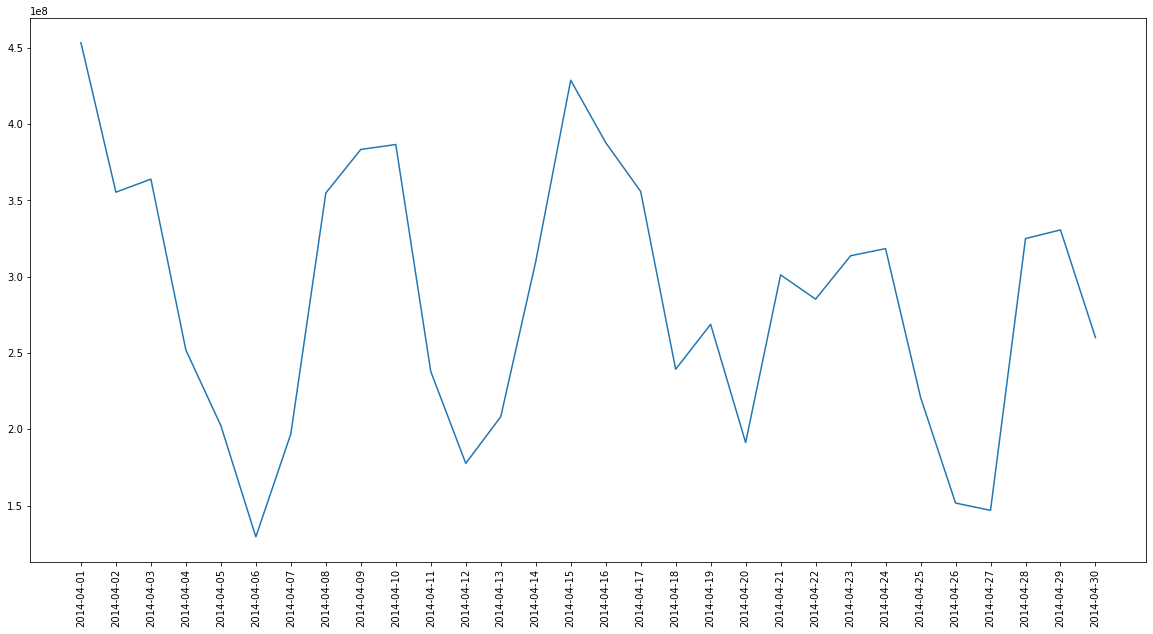

In [18]:
purchase2 = purchase[(purchase.index >= '2014-04-01') & (purchase.index <= '2014-04-30')]
# 画出走势图
plt.figure(figsize=(20, 10))
plt.plot(purchase2.total_purchase_amt)
date_range = pd.date_range('2014-04-01', '2014-04-30')
_ = plt.xticks(date_range, rotation=90)

In [19]:
# 查看序列平稳性
from statsmodels.tsa.stattools import adfuller
t = adfuller(purchase['total_purchase_amt'])
t

(-1.5898802926313507,
 0.4886749751375928,
 18,
 408,
 {'1%': -3.446479704252724,
  '5%': -2.8686500930967354,
  '10%': -2.5705574627547096},
 15960.28197033403)

In [20]:
# 进行一阶差分
diff1 = purchase.diff(1)[1:]
t = adfuller(diff1)
t

(-7.947102224652354,
 3.1981868624879897e-12,
 18,
 407,
 {'1%': -3.4465195891135845,
  '5%': -2.8686676281678634,
  '10%': -2.5705668101226085},
 15918.844657651942)

In [21]:
t = adfuller(redeem['total_redeem_amt'])
t

(-1.3724136798283428,
 0.5954275877949456,
 13,
 413,
 {'1%': -3.4462831955497135,
  '5%': -2.8685636962704395,
  '10%': -2.5705114078759914},
 15816.780952766481)

In [22]:
# 进行一阶差分
diff1 = redeem.diff(1)[1:]
t = adfuller(diff1)
t

(-11.69198690696882,
 1.6443717458499181e-21,
 12,
 413,
 {'1%': -3.4462831955497135,
  '5%': -2.8685636962704395,
  '10%': -2.5705114078759914},
 15779.04993673871)

In [23]:
from statsmodels.tsa.arima_model import ARIMA

# p, d, q 其中d = 1
model = ARIMA(purchase, order=(7,1,5)).fit()
# 使用typ='levels'对原始数据维度上进行预测，相当于进行了反差分
print(model.aic)
purchase_pred = model.predict('2014-09-01', '2014-09-30', typ='levels')
purchase_pred.head()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


16669.646033968467


2014-09-01    3.310537e+08
2014-09-02    3.318774e+08
2014-09-03    3.338924e+08
2014-09-04    2.983213e+08
2014-09-05    2.407527e+08
Freq: D, dtype: float64

In [24]:
# p, d, q 其中d = 1
model2 = ARIMA(redeem, order=(7,1,5)).fit()
print(model2.aic)
# 使用typ='levels'对原始数据维度上进行预测，相当于进行了反差分
redeem_pred = model2.predict('2014-09-01', '2014-09-30', typ='levels')
redeem_pred.head()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


16520.453340505435


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


2014-09-01    3.168965e+08
2014-09-02    3.372439e+08
2014-09-03    3.632380e+08
2014-09-04    3.074701e+08
2014-09-05    2.627952e+08
Freq: D, dtype: float64

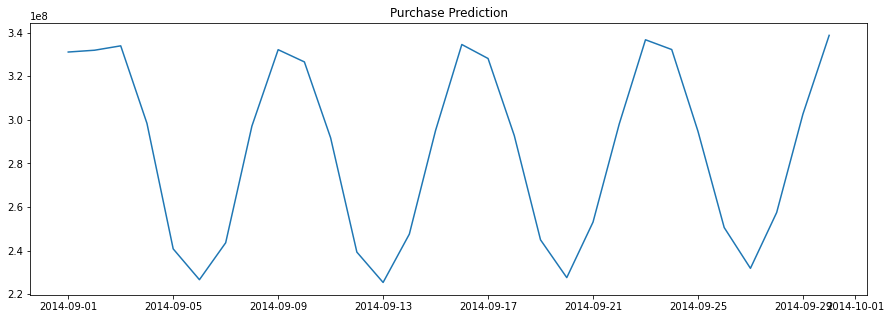

In [25]:
plt.figure(figsize=(15,5))
plt.title('Purchase Prediction')
plt.plot(purchase_pred)
plt.show()

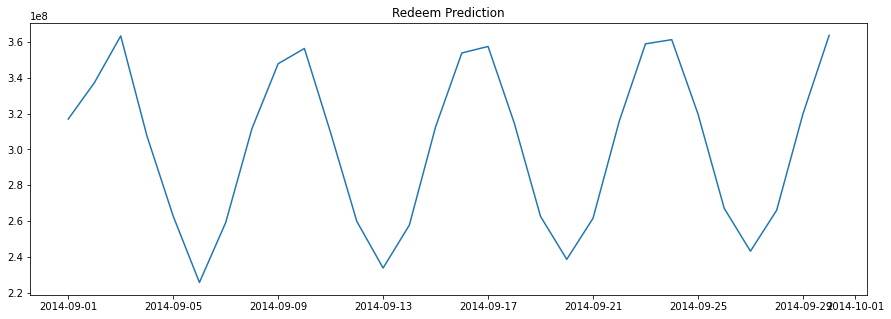

In [26]:
plt.figure(figsize=(15,5))
plt.title('Redeem Prediction')
plt.plot(redeem_pred)
plt.show()

In [27]:
result = pd.DataFrame()
result['date'] = purchase_pred.index
result['purchase'] = purchase_pred.values
result['redeem'] = redeem_pred.values
result['date'] = result['date'].apply(lambda x:str(x).replace('-','')[0:8])
result.head()

,date,purchase,redeem
0,20140901,3.310537e+08,3.168965e+08
1,20140902,3.318774e+08,3.372439e+08
2,20140903,3.338924e+08,3.632380e+08
3,20140904,2.983213e+08,3.074701e+08
4,20140905,2.407527e+08,2.627952e+08


In [28]:
# 保存结果
result.to_csv('prophet_arima.csv', header=None, index=False)

In [29]:
# 给数据添加时间维度
def add_timestamp(data):
    # 时间格式转换
    data['report_date'] = pd.to_datetime(data['report_date'], format='%Y%m%d')
    # 添加时间维度
    data['day'] = data['report_date'].dt.day
    data['month'] = data['report_date'].dt.month
    data['year'] = data['report_date'].dt.year
    data['week'] = data['report_date'].dt.week
    data['weekday'] = data['report_date'].dt.weekday
    return data

data1 = add_timestamp(data)
data1.head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,...,share_amt,category1,category2,category3,category4,day,month,year,week,weekday
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,5,8,2014,32,1
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,8,8,2014,32,4
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,11,8,2014,33,0
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,14,8,2014,33,3
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,17,8,2014,33,6


In [30]:
# 0代表周一，6代表周日
data['weekday'].value_counts()

6    410701
5    408824
4    407509
3    405907
2    404159
1    402536
0    400785
Name: weekday, dtype: int64

In [31]:
def get_total_balance(data, begin):
    # 在copy数据上进行操作
    df_temp = data.copy()
    # 按照date进行聚合
    df_temp = df_temp.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum()
    # 还原date字段，重新索引
    df_temp.reset_index(inplace=True)
    df_temp = df_temp[df_temp['report_date'] >= begin]
    return df_temp

# 筛选从2014-04-01之后的数据 作为平稳数据
total_balance = get_total_balance(data, '2014-03-01')
total_balance.head()

,report_date,total_purchase_amt,total_redeem_amt
243,2014-03-01,362865580,211279011
244,2014-03-02,276202230,246199417
245,2014-03-03,505305862,513017360
246,2014-03-04,524146340,250562978
247,2014-03-05,454295491,209072753


In [32]:
import datetime
import numpy as np
# 生成测试数据
def generate_test_data(data):
    # 在copy数据上进行操作
    total_balance = data.copy()
    # 生成2014-09-01到2014-09-30的数据
    start = datetime.datetime(2014, 9, 1)
    end = datetime.datetime(2014, 10, 1)
    test_data = []
    while start != end:
        # 添加3个字段，date， total_purchase_amt, total_redeem_amt
        temp = [start, np.nan, np.nan]
        test_data.append(temp)
        # 日期 + 1
        start += datetime.timedelta(days=1)        
    # 封装test_data
    test_data = pd.DataFrame(test_data)
    test_data.columns = total_balance.columns
    # 将test_data合并到total_balance中
    total_balance = pd.concat([total_balance, test_data], axis=0)
    return total_balance

total_balance = generate_test_data(total_balance)
total_balance.head()

,report_date,total_purchase_amt,total_redeem_amt
243,2014-03-01,362865580.0,211279011.0
244,2014-03-02,276202230.0,246199417.0
245,2014-03-03,505305862.0,513017360.0
246,2014-03-04,524146340.0,250562978.0
247,2014-03-05,454295491.0,209072753.0


In [33]:
# 对total_balance添加时间维度
total_balance = add_timestamp(total_balance)
total_balance.head()

,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
243,2014-03-01,362865580.0,211279011.0,1,3,2014,9,5
244,2014-03-02,276202230.0,246199417.0,2,3,2014,9,6
245,2014-03-03,505305862.0,513017360.0,3,3,2014,10,0
246,2014-03-04,524146340.0,250562978.0,4,3,2014,10,1
247,2014-03-05,454295491.0,209072753.0,5,3,2014,10,2


In [34]:
backup = total_balance.copy()
total_balance = backup.copy()

In [35]:
weekday_weight = total_balance[['weekday', 'total_purchase_amt', 'total_redeem_amt']].groupby('weekday', as_index=False).mean()
weekday_weight = weekday_weight.rename(columns={'total_purchase_amt': 'purchase_weekday',
                                               'total_redeem_amt': 'redeem_weekday'})
weekday_weight.head()

,weekday,purchase_weekday,redeem_weekday
0,0,3.273693e+08,3.456808e+08
1,1,3.340518e+08,3.221266e+08
2,2,3.213877e+08,3.181960e+08
3,3,3.146910e+08,2.821480e+08
4,4,2.492893e+08,2.680463e+08


In [36]:
weekday_weight['purchase_weekday'] /= np.mean(total_balance['total_purchase_amt'])
weekday_weight['redeem_weekday'] /= np.mean(total_balance['total_redeem_amt'])
weekday_weight.head()

,weekday,purchase_weekday,redeem_weekday
0,0,1.185411,1.257964
1,1,1.209608,1.172248
2,2,1.163752,1.157944
3,3,1.139503,1.026762
4,4,0.902682,0.975445


In [37]:
total_balance = pd.merge(total_balance, weekday_weight, on='weekday', how='left')
total_balance.head()

,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday,purchase_weekday,redeem_weekday
0,2014-03-01,362865580.0,211279011.0,1,3,2014,9,5,0.709237,0.669791
1,2014-03-02,276202230.0,246199417.0,2,3,2014,9,6,0.712065,0.761712
2,2014-03-03,505305862.0,513017360.0,3,3,2014,10,0,1.185411,1.257964
3,2014-03-04,524146340.0,250562978.0,4,3,2014,10,1,1.209608,1.172248
4,2014-03-05,454295491.0,209072753.0,5,3,2014,10,2,1.163752,1.157944


In [38]:
# 计算日期因子
# 统计周一到周日，在1-31号中出现的频次['weekday', 'day']出现的频次
weekday_count = total_balance[['report_date', 'day', 'weekday']].groupby(['day', 'weekday'], as_index=False).count()
weekday_count = pd.merge(weekday_count, weekday_weight, on='weekday')
weekday_count.head()

,day,weekday,report_date,purchase_weekday,redeem_weekday
0,1,0,1,1.185411,1.257964
1,2,0,1,1.185411,1.257964
2,3,0,1,1.185411,1.257964
3,4,0,1,1.185411,1.257964
4,5,0,1,1.185411,1.257964


In [39]:
# 日期计算 = 周期因子 * （周一到周日在1-31日中出现的频次）/一共有几个月
weekday_count['purchase_weekday'] = weekday_count['purchase_weekday'] * weekday_count['report_date'] / len(np.unique(total_balance['month']))
weekday_count['redeem_weekday'] = weekday_count['redeem_weekday'] * weekday_count['report_date'] / len(np.unique(total_balance['month']))

In [40]:
# 得到日期因子
day_rate = weekday_count.drop(['weekday', 'report_date'], axis=1).groupby('day', as_index=False).sum()
day_rate.head()

,day,purchase_weekday,redeem_weekday
0,1,1.009731,1.005167
1,2,1.006644,1.021864
2,3,1.037011,1.010455
3,4,1.030815,1.046789
4,5,1.002776,0.989992


In [41]:
# 按照日期day，计算均值，即1号的均值，2号的均值。。。
day_mean = total_balance[['day', 'total_purchase_amt', 'total_redeem_amt']].groupby('day', as_index=False).mean()
day_mean.head()

,day,total_purchase_amt,total_redeem_amt
0,1,3.253391e+08,2.347676e+08
1,2,2.481255e+08,2.186074e+08
2,3,2.994808e+08,2.968247e+08
3,4,3.159802e+08,2.925598e+08
4,5,3.286272e+08,2.552484e+08


In [42]:
day_pred = pd.merge(day_mean, day_rate, on='day', how='left')
day_pred['total_purchase_amt'] /= day_pred['purchase_weekday']
day_pred['total_redeem_amt'] /= day_pred['redeem_weekday']
day_pred.head()

,day,total_purchase_amt,total_redeem_amt,purchase_weekday,redeem_weekday
0,1,3.222038e+08,2.335608e+08,1.009731,1.005167
1,2,2.464879e+08,2.139300e+08,1.006644,1.021864
2,3,2.887923e+08,2.937537e+08,1.037011,1.010455
3,4,3.065345e+08,2.794832e+08,1.030815,1.046789
4,5,3.277176e+08,2.578287e+08,1.002776,0.989992


In [43]:
for index, row in day_pred.iterrows():
    if row['day'] == 31:
        break
    # 添加日期字段 report_date
    day_pred.loc[index, 'report_date'] = pd.to_datetime('2014/09/'+str(int(row['day'])))
day_pred.head()

,day,total_purchase_amt,total_redeem_amt,purchase_weekday,redeem_weekday,report_date
0,1,3.222038e+08,2.335608e+08,1.009731,1.005167,2014-09-01
1,2,2.464879e+08,2.139300e+08,1.006644,1.021864,2014-09-02
2,3,2.887923e+08,2.937537e+08,1.037011,1.010455,2014-09-03
3,4,3.065345e+08,2.794832e+08,1.030815,1.046789,2014-09-04
4,5,3.277176e+08,2.578287e+08,1.002776,0.989992,2014-09-05


In [44]:
# 利用周期因子，进行 base * 周期因子 = 预测结果
day_pred['weekday'] = day_pred['report_date'].dt.weekday
day_pred.head()

,day,total_purchase_amt,total_redeem_amt,purchase_weekday,redeem_weekday,report_date,weekday
0,1,3.222038e+08,2.335608e+08,1.009731,1.005167,2014-09-01,0.0
1,2,2.464879e+08,2.139300e+08,1.006644,1.021864,2014-09-02,1.0
2,3,2.887923e+08,2.937537e+08,1.037011,1.010455,2014-09-03,2.0
3,4,3.065345e+08,2.794832e+08,1.030815,1.046789,2014-09-04,3.0
4,5,3.277176e+08,2.578287e+08,1.002776,0.989992,2014-09-05,4.0


In [45]:
day_pred = day_pred[['day', 'total_purchase_amt', 'total_redeem_amt', 'report_date', 'weekday']]
day_pred = pd.merge(day_pred, weekday_weight, on='weekday')
day_pred.head()

,day,total_purchase_amt,total_redeem_amt,report_date,weekday,purchase_weekday,redeem_weekday
0,1,3.222038e+08,2.335608e+08,2014-09-01,0.0,1.185411,1.257964
1,8,2.890537e+08,2.462531e+08,2014-09-08,0.0,1.185411,1.257964
2,15,2.929654e+08,2.290269e+08,2014-09-15,0.0,1.185411,1.257964
3,22,2.406857e+08,2.599297e+08,2014-09-22,0.0,1.185411,1.257964
4,29,2.419552e+08,2.677531e+08,2014-09-29,0.0,1.185411,1.257964


In [46]:
day_pred['total_purchase_amt'] *= day_pred['purchase_weekday']
day_pred['total_redeem_amt'] *= day_pred['redeem_weekday']
day_pred.head()

,day,total_purchase_amt,total_redeem_amt,report_date,weekday,purchase_weekday,redeem_weekday
0,1,3.819439e+08,2.938111e+08,2014-09-01,0.0,1.185411,1.257964
1,8,3.426474e+08,3.097775e+08,2014-09-08,0.0,1.185411,1.257964
2,15,3.472844e+08,2.881076e+08,2014-09-15,0.0,1.185411,1.257964
3,22,2.853115e+08,3.269821e+08,2014-09-22,0.0,1.185411,1.257964
4,29,2.868163e+08,3.368237e+08,2014-09-29,0.0,1.185411,1.257964


In [47]:
# 按照日期report_date 从小到大进行排序
day_pred = day_pred.sort_values('report_date')[['report_date', 'total_purchase_amt', 'total_redeem_amt']]
day_pred.head()

,report_date,total_purchase_amt,total_redeem_amt
0,2014-09-01,3.819439e+08,2.938111e+08
5,2014-09-02,2.981538e+08,2.507790e+08
10,2014-09-03,3.360825e+08,3.401504e+08
14,2014-09-04,3.492969e+08,2.869627e+08
18,2014-09-05,2.958247e+08,2.514977e+08


In [48]:
day_pred['report_date'] = day_pred['report_date'].apply(lambda x:str(x).replace('-','')[0:8])
day_pred.head()

,report_date,total_purchase_amt,total_redeem_amt
0,20140901,3.819439e+08,2.938111e+08
5,20140902,2.981538e+08,2.507790e+08
10,20140903,3.360825e+08,3.401504e+08
14,20140904,3.492969e+08,2.869627e+08
18,20140905,2.958247e+08,2.514977e+08


In [49]:
# 保存结果
day_pred.to_csv('prophet_rule.csv', header=None, index=False)